In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("D:\DATA\data.N\Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [9]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [12]:
df['location']=df['location'].fillna('Sarjapur Road')

In [13]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [14]:
df['size']=df['size'].fillna('2 BHK')

In [15]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [17]:
num_var = []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float':
        num_var.append(i)

Column :-  bath


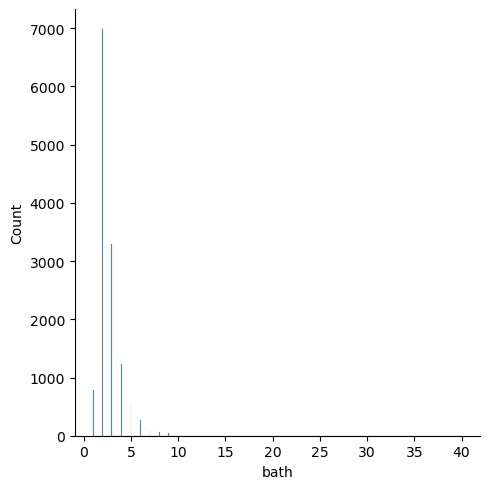


Column :-  price


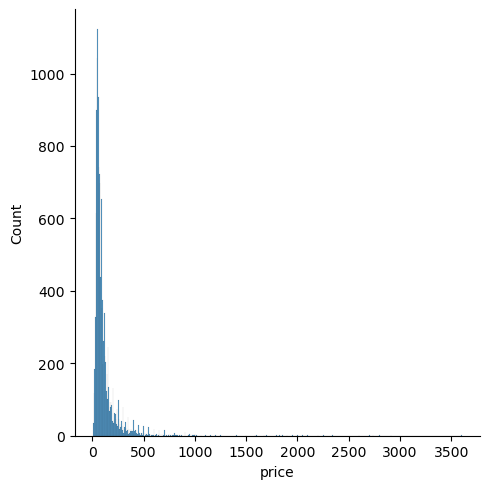

In [18]:
for j in num_var:
    print('Column :- ',j)
    sns.displot(df[j])
    plt.show()
    print('')

In [19]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [20]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
def convertRange(x):
    temp = x.split('_')
    if len(temp) == 2:
        return (float(temp[0])+ float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [24]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Price Per Square feet

In [25]:
df['price_per_sqft']=df['price']*100000 / df['total_sqft']

In [26]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [27]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13073.000000,13320.000000,13320.000000,13320.000000,1.307300e+04
mean,1554.942029,2.688814,112.565627,2.802778,7.949600e+03
std,1238.458773,1.338754,148.971674,1.294496,1.072440e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.265734e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.338057e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [28]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [29]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count=df['location'].value_counts()

In [30]:
location_count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [31]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [32]:
df['location']=df['location'].apply(lambda x:'other' if x in location_count_less_10 else x)

In [33]:
df['location'].value_counts()

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

Outlier detection and removal

In [34]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13073.000000,13320.000000,13320.000000,13320.000000,1.307300e+04
mean,1554.942029,2.688814,112.565627,2.802778,7.949600e+03
std,1238.458773,1.338754,148.971674,1.294496,1.072440e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.265734e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.338057e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [35]:
(df['total_sqft']/df['bhk']).describe()

count    13073.000000
mean       573.254923
std        389.887823
min          0.250000
25%        472.000000
50%        551.000000
75%        625.000000
max      26136.000000
dtype: float64

In [36]:
df=df[((df['total_sqft']/df['bhk']) >= 300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000
mean,1590.166773,2.561441,111.444236,2.651472,6322.476758
std,1261.827604,1.072551,152.759322,0.973754,4187.479096
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1118.000000,2.000000,49.340000,2.000000,4207.119741
50%,1300.000000,2.000000,70.000000,3.000000,5300.000000
75%,1700.000000,3.000000,115.000000,3.000000,6938.483548
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [37]:
df.shape

(12329, 7)

In [38]:
df.price_per_sqft.describe()

count     12329.000000
mean       6322.476758
std        4187.479096
min         267.829813
25%        4207.119741
50%        5300.000000
75%        6938.483548
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        
        st = np.std(subdf.price_per_sqft)
                          
        gen_df=subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index = True)
    return df_output
df=remove_outliers_sqft(df)
df.describe()                           

,total_sqft,bath,price,bhk,price_per_sqft
count,10153.000000,10153.000000,10153.000000,10153.000000,10153.000000
mean,1502.725758,2.471880,91.104765,2.573525,5669.621675
std,873.997461,0.971938,86.241338,0.893533,2274.739750
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4242.424242
50%,1283.000000,2.000000,67.000000,2.000000,5183.823529
75%,1650.000000,3.000000,100.000000,3.000000,6451.612903
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [40]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')            

In [41]:
df=bhk_outlier_remover(df)

In [42]:
df.drop(columns =['size','price_per_sqft'],inplace=True)

Cleaned Data

In [43]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [44]:
df.to_csv("Cleaned_data.csv")

In [45]:
X=df.drop(columns=['price'])
y=df['price']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size=0.3)
X_train.shape,X_test.shape

((5058, 4), (2169, 4))

Applying Liner Regression

In [48]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),
                                     remainder='passthrough')

In [49]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 ['location'])])

In [50]:
scaler = StandardScaler()

In [51]:
lr = LinearRegression(normalize=True)

In [52]:
pipe=make_pipeline(column_trans,scaler,lr)

In [53]:
pipe.fit(X_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [54]:
y_pred_lr=pipe.predict(X_test)

In [55]:
r2_score(y_test,y_pred_lr)

0.7816794539311951

Applying Lasso 

In [56]:
lasso=Lasso()

In [57]:
pipe= make_pipeline(column_trans,scaler,lasso)

In [58]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [59]:
y_pred_lasso=pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.7727287371024877

Applying Ridge

In [60]:
ridge= Ridge()

In [61]:
pipe = make_pipeline(column_trans,scaler,ridge)

In [62]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [63]:
y_pred_ridge=pipe.predict(X_test)

In [64]:
r2_score(y_test,y_pred_ridge)

0.7815675037616527

In [66]:
print("NO Regularization:", r2_score(y_test,y_pred_lr))
print("Lasso", r2_score(y_test,y_pred_lasso))
print("Ridge", r2_score(y_test,y_pred_ridge))

NO Regularization: 0.7816794539311951
Lasso 0.7727287371024877
Ridge 0.7815675037616527
